# Car Accident EDA

## Basic Information about the dataset
Data has 3513617 rows x 49 features, the features can be treated in five major categories: 
1. Time (Time Zone, Start and End Time)
2. Geo Location (Lat and Lon, Street and City .etc)
3. Weather Condition (Temperature, Visibility .etc)
4. Road Condition (Junction, Crossing ..)
5. Accident Description (TMC, Severity, Distance, Description)

In [1]:
# Load Librariesh
import numpy as np 
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings

In [8]:
data = pd.read_csv("Data/US_Accidents_June20.csv")

In [10]:
data.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
data.shape

(3513617, 49)

In [9]:
data.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


Almost all the weather data has some missing values, maybe we should consider to bin it for futhur analysis. And we can see some impossible data, for example, wind speed over 200 mph even gets to 822 mph.

In [12]:
# Check for missing values
for name in data.columns:
    print(name, sum(data[name].isna())*100/3513617)

ID 0.0
Source 0.0
TMC 29.451104090172606
Severity 0.0
Start_Time 0.0
End_Time 0.0
Start_Lat 0.0
Start_Lng 0.0
End_Lat 70.5488959098274
End_Lng 70.5488959098274
Distance(mi) 0.0
Description 2.8460700184453798e-05
Number 64.40269386219386
Street 0.0
Side 0.0
City 0.0031875984206588253
County 0.0
State 0.0
Zipcode 0.03042448849718111
Country 0.0
Timezone 0.11042751671568074
Airport_Code 0.19233741184653877
Weather_Timestamp 1.2330029140910919
Temperature(F) 1.870778744524517
Wind_Chill(F) 53.17167465890562
Humidity(%) 1.9833408137540318
Pressure(in) 1.590440847707647
Visibility(mi) 2.1589148731919274
Wind_Direction 1.675595262659533
Wind_Speed(mph) 12.938490450154356
Precipitation(in) 57.657792525480154
Weather_Condition 2.166940790643943
Amenity 0.0
Bump 0.0
Crossing 0.0
Give_Way 0.0
Junction 0.0
No_Exit 0.0
Railway 0.0
Roundabout 0.0
Station 0.0
Stop 0.0
Traffic_Calming 0.0
Traffic_Signal 0.0
Turning_Loop 0.0
Sunrise_Sunset 0.0032729805212121867
Civil_Twilight 0.0032729805212121867
Naut

In [13]:
data['Wind_Speed(mph)'].unique()

array([  nan,   3.5,   4.6,   1.2,   5.8,   2.3,   6.9,   8.1,  10.4,
         9.2,  11.5,  13.8,  15. ,  12.7,  19.6,  21.9,  18.4,  25.3,
        16.1,  24.2,  23. ,  17.3,  27.6,  29.9,  20.7,  10. ,  26.5,
         5. ,  31.1,  33.4,  28.8,  35.7,  42.6,  36.8,  32.2,  40.3,
       142.7,  73.6,  69. ,  38. ,   8. ,   9. ,   3. ,  14. ,   7. ,
         0. ,  12. ,   6. ,  13. ,   1. ,   2. ,  47.2,  17. ,  16. ,
        21. ,  28. ,  20. ,  26. ,  18. ,  22. ,  57.5,  34.5, 241.7,
        24. , 100.1, 123.1, 822.8,  41.4, 162.3,  66.7,  30. ,  29. ,
       126.6, 127.7,  25. ,  39.1,  54.1,  97.8,  76. , 174.9,  44.9,
        31. ,  37. ,  32. ,  33. ,  35. ,  46. ,  66. ,  40. ,  64. ,
        51. ,  36. , 117. ,  48. ,  39. ,  93. ,  41. ,  52. ,  47. ,
       230. , 255. ,  82. ,  44. ,  67. ,  49. ,  58. ,  53. ,  43. ,
       161. , 116. , 113. , 127. , 157. , 175. ,  49.5,  43.7,  77.1,
        51.8, 116.2, 119.7, 703.1,  79.4,  61. , 254.3, 110.5,  50.6,
       124.3, 328. ,

## Check for Seasonality
We can see stronge seasonality, weekdays has more accidents than weekends.

In [14]:
data['acc_year'] = pd.to_datetime(data['Start_Time']).dt.year
data['acc_month'] = pd.to_datetime(data['Start_Time']).dt.month
data['acc_hr_day'] = pd.to_datetime(data['Start_Time']).dt.hour
data['new_date'] = pd.to_datetime(data['Start_Time']).dt.date
data['day_name'] = pd.to_datetime(data['Start_Time']).dt.day_name()

In [28]:
# Daily accidents over year
temp = data.groupby('new_date')['ID'].count().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['new_date'], y=temp['ID']))

fig.update_layout(title_text='Daily accidents trend over the year',xaxis_rangeslider_visible=True)
fig.show()

In [27]:
# Accident on Different Days of Week
temp = data.groupby('day_name')['ID'].count().reset_index(name = 'count')
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['day_name'], y=temp['count']))

fig.update_layout(title_text='Accident on Different Days of Week', margin = dict(t=80, l=20, r=20, b=20))

fig.show()

In [29]:
# Accident on Different Month
temp = data.groupby('acc_month')['ID'].count().reset_index(name = 'count')
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['acc_month'], y=temp['count']))

fig.update_layout(title_text='Accident on Different Month',margin = dict(t=80, l=20, r=20, b=20))

fig.show()

In [31]:
# Accident on Different Hour
temp = data.groupby('acc_hr_day')['ID'].count().reset_index(name = 'count')
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['acc_hr_day'], y=temp['count']))

fig.update_layout(title_text='Accident on Different Hour',margin = dict(t=80, l=20, r=20, b=20))

fig.show()

## Check for Geo Locations
Based on the state level, we can see that the population density is related to the number of car accidents. If we want to look into county level, we can use Tableau to visualize it. 

In [34]:
# State Level
state_count_acc = pd.value_counts(data['State'])

fig = go.Figure(data=go.Choropleth(
    locations=state_count_acc.index,
    z = state_count_acc.values.astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Count Accidents",
))

fig.update_layout(
    title_text = 'US Traffic Accident Dataset by State',
    geo_scope='usa',
)

fig.show()

Accidents with severity level 1, indicates the least impact on traffic (i.e., short delay as a result of the accident), occured barely; with severity level 4,  indicates a significant impact on traffic (i.e., long delay), occured little number of times; with severity level 2 and 3, indicate the impact on traffic is around in midlevel, were occured quite frequently.

Although California has the most number of car accidents, the severity of car accidents are showing pretty mild comparing to other states. Most of the sever car accidents happens in Arizona, Colorado and East Coast.

In [39]:
# State Level Serverity by Sampling
data_sever = data.sample(n=1000)

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = data_sever['Start_Lng'],
        lat = data_sever['Start_Lat'],
        text = data_sever['City'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = False,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Reds',
            cmax = data_sever['Severity'].max(),
            color = data_sever['Severity'],
            cmin = 1,
            colorbar_title="Severity"
        )))

fig.update_layout(
        title = 'Severity of accidents',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.7,
            subunitwidth = 0.7
        ),
    )
fig.show()

<Figure size 1440x576 with 0 Axes>

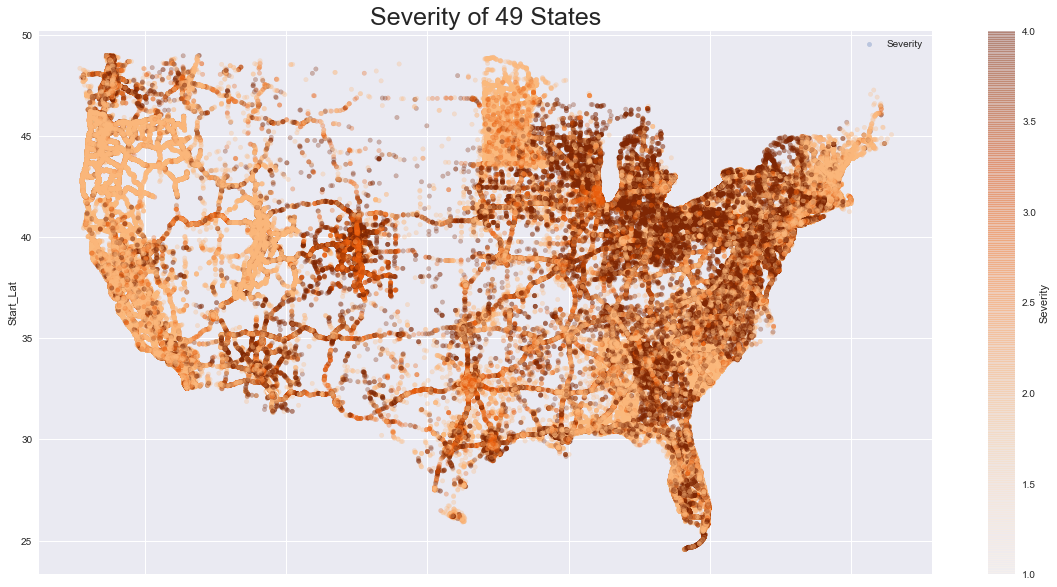

In [65]:
# Severity of 49 States
# plt.figure(figsize=(20,8))
# Point = data[data.Severity<5]
# Sca = Point.plot(kind='scatter', x='Start_Lng',y='Start_Lat',label='Severity',c='Severity',
#                  cmap=plt.get_cmap('Oranges'),colorbar=True,alpha=0.3,figsize=(20,10))
# plt.title("Severity of 49 States",fontsize=25)
# Sca.legend()
# plt.ioff()

## Check for Weather
This histogram tells us that most of the accidents were happened when the weather were neither too hot nor too cold to go out.

C:\Users\luoda\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\luoda\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



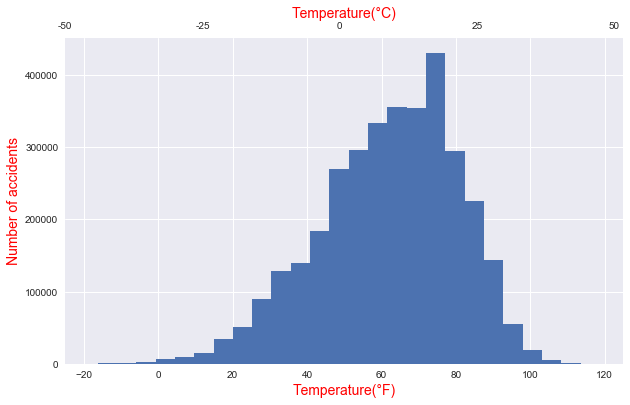

In [44]:
df_T = data['Temperature(F)'].values
num_bins = 50

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

# the histogram of the data
n, bins, patches = ax1.hist(df_T, num_bins, density=0) # set density=1 to normalize
# find bincenters
# bincenters = 0.5*(bins[1:]+bins[:-1])


ax1.set_xlabel(r"Temperature(°F)", fontsize=14, color='red')
ax1.set_ylabel('Number of accidents', fontsize=14, color='red')
ax1.set_xlim(-25, 125) # set xlim 
# Set the temperature in celisius
ax2 = ax1.twiny()
ax2.set_xlabel(r"Temperature(°C)", fontsize=14, color='red')
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks([-58, -13, 32, 77, 122])
ax2.set_xticklabels(['-50', '-25', '0','25', '50'])
plt.title("Temperature vs. Number of Accidents")
plt.grid()
plt.show()

In [66]:
data['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

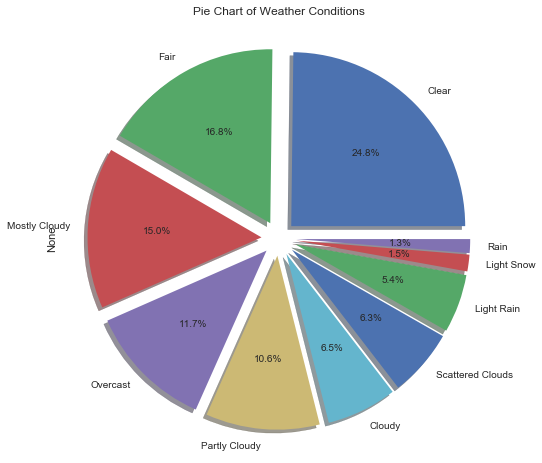

In [70]:
# Weather Condition for top 10 conditions
plt.figure(figsize=(20,8))
data.groupby('Weather_Condition') \
        .size() \
        .sort_values(ascending = False) \
        .iloc[:10] \
        .plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title("Pie Chart of Weather Conditions")
plt.ioff()

People tend to be careless during the nice weather.

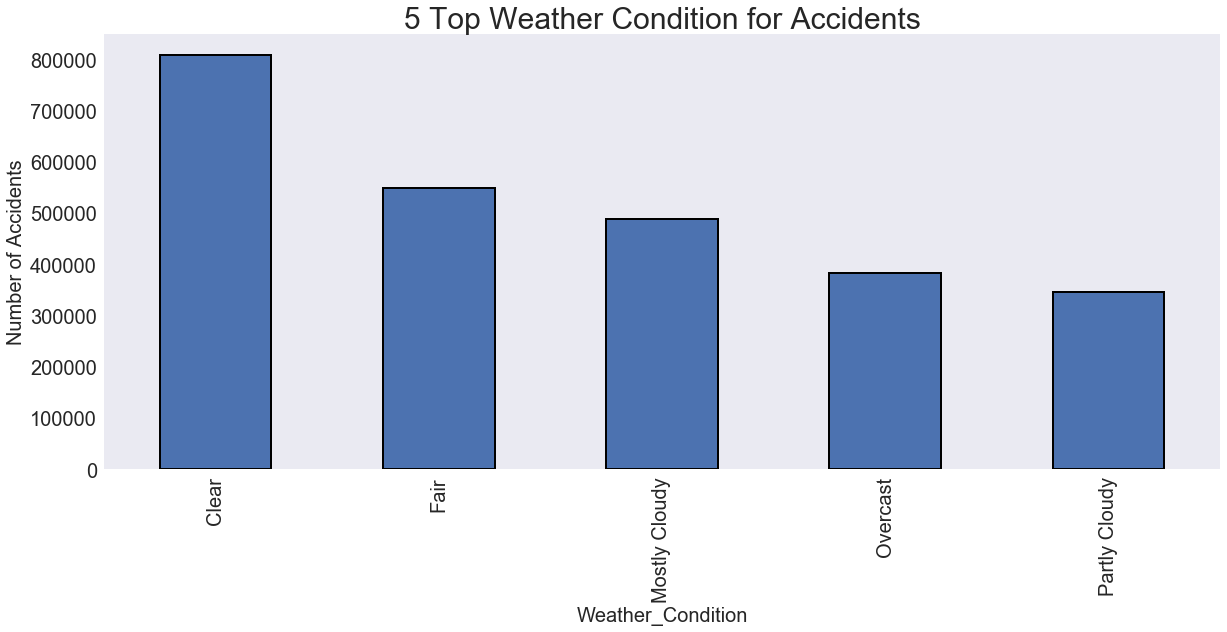

In [71]:
fig, ax=plt.subplots(figsize=(20,8))

data['Weather_Condition'].value_counts().sort_values(ascending=False).\
    head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)

plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)

plt.title('5 Top Weather Condition for Accidents',fontsize=30)
plt.grid(False)
plt.ioff()

## Check for Roadway Conditions

'Stop' feature barely has an impact or correlation.

In [47]:
data.Stop.value_counts()/data.shape[0]

False    0.985207
True     0.014793
Name: Stop, dtype: float64

'Sunrise_Sunset' does have considerable impact that around 26.2% of whole accidents occured during the night.

In [50]:
data['Sunrise_Sunset'].value_counts()/data.shape[0]

Day      0.738201
Night    0.261766
Name: Sunrise_Sunset, dtype: float64

The 'Traffic_Signal' has also some impact like such that around 17.7% of whole accidents occured nearby traffic signal locations.

In [49]:
data['Traffic_Signal'].value_counts()/data.shape[0]

False    0.822513
True     0.177487
Name: Traffic_Signal, dtype: float64

This 'Give_Way', indicates traffic signs / rules, hardly have impact on traffic accidents.

In [51]:
data['Give_Way'].value_counts()/data.shape[0]

False    0.997278
True     0.002722
Name: Give_Way, dtype: float64

## Check for Description
We will need to use NLP to label the dataset based on some research papers, but we can take a peek at the description.

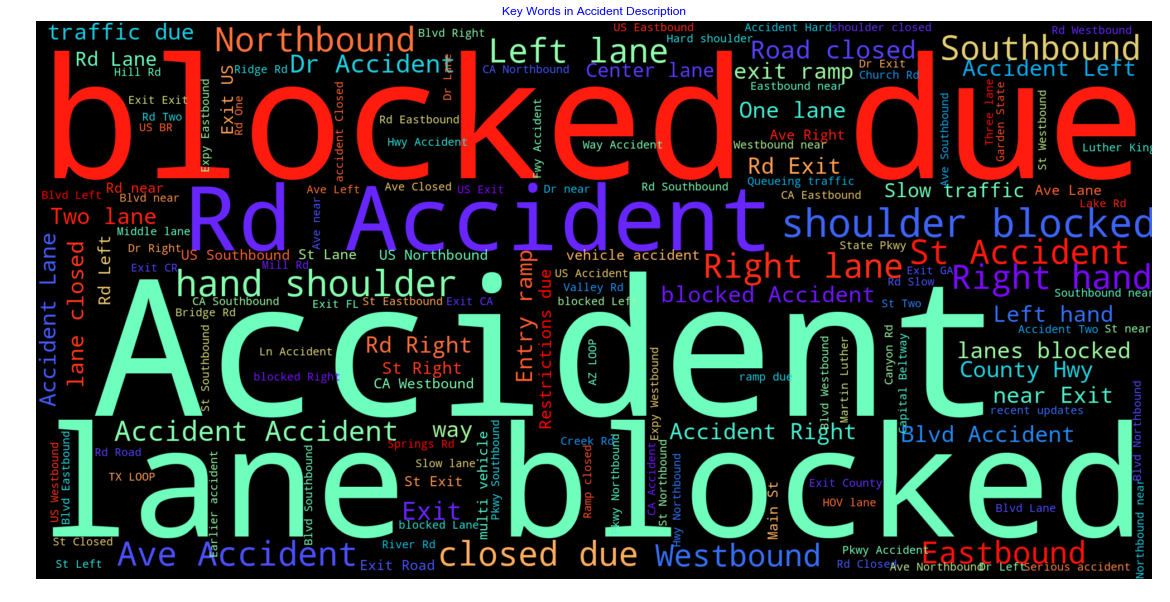

In [42]:
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds = data["Description"].str.split("(").str[0].value_counts().keys()

wc = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="black").generate(" ".join(wrds))
plt.figure(figsize=(20,14))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Accident Description",color='b')
plt.show()